In [1]:
import numpy as np
import matplotlib.pyplot as plt
from VQE import VQE
from GroupingAlgorithm import *
from utils import *
# Importing standard Qiskit libraries
from qiskit import IBMQ, QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import EfficientSU2
from qiskit.utils.quantum_instance import QuantumInstance
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter
from qiskit.algorithms.optimizers import SPSA
from IPython.display import display, clear_output

In [2]:
IBMQ.load_account()
provider      = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic') 
backend_paris = provider.get_backend('ibmq_paris')
WC_paris      = get_backend_conectivity(backend_paris)
backend_sim   = AerSimulator(method="statevector") # Backend for simulation
backend_noise = AerSimulator.from_backend(backend_paris)
NUM_SHOTS = 2**13  # Number of shots for each circuit

In [3]:
qubit_op, init_state = LiH(initial_state=True)
num_qubits = qubit_op.num_qubits
print( qubit_op )

-0.20316612481217325 * IIII
+ (-0.365258527098598-1.3877787807814457e-17j) * ZIII
+ 0.09275974420404098 * IZII
- 0.2118902053549851 * ZZII
+ (0.365258527098598+2.7755575615628914e-17j) * IIZI
- 0.11384420116816225 * ZIZI
+ 0.11395335131674317 * IZZI
+ (-0.06043919280467715-3.469446951953614e-18j) * ZZZI
+ (-0.09275974420404105-3.469446951953614e-18j) * IIIZ
+ 0.11395335131674318 * ZIIZ
+ (-0.12274347556009738-6.938893903907228e-18j) * IZIZ
+ 0.056287757667526306 * ZZIZ
+ (-0.2118902053549851-6.938893903907228e-18j) * IIZZ
+ 0.06043919280467715 * ZIZZ
- 0.056287757667526306 * IZZZ
+ 0.0846016988633049 * ZZZZ
+ 0.019390023793252498 * XIII
+ (-0.019390023793252498+8.673617379884035e-19j) * XZII
- 0.010951534973539137 * XIZI
+ 0.010951534973539137 * XZZI
+ 0.01277809801936714 * XIIZ
- 0.01277809801936714 * XZIZ
- 0.00900252139905185 * XIZZ
+ 0.00900252139905185 * XZZZ
- 0.002936887226605865 * IXII
- 0.0029368872266058656 * ZXII
+ 0.010679892682752462 * IXZI
+ 0.010679892682752462 * ZXZI
- 

In [8]:
distance=1.339
from qiskit_nature.drivers import PyQuanteDriver
molecule = 'H 0.0 0.0 -'+str(distance)+'; Be 0.0 0.0 0.0; H 0.0 0.0 '+str(distance)
driver = PyQuanteDriver(molecule)
qmolecule = driver.run()

In [6]:
qubit_op = BeH2(initial_state=False)
num_qubits = qubit_op.num_qubits
print( qubit_op )

-0.9293513730666199 * IIIIIIIIII
- 0.7522249305974543 * ZIIIIIIIII
+ 0.07361553747582186 * IZIIIIIIII
- 0.49406731228507983 * ZZIIIIIIII
+ 0.0789999591169598 * ZIZIIIIIII
- 0.4287877181632385 * IZZIIIIIII
+ 0.0935229583855962 * ZZZIIIIIII
+ (0.061656466361585206+3.469446951953614e-18j) * IIIZIIIIII
+ 0.09427772585578933 * IZIZIIIIII
- 0.4287877181632384 * IIZZIIIIII
+ 0.09352295838559616 * ZIZZIIIIII
+ 0.0789999591169598 * ZZZZIIIIII
+ (-0.23011052074153932-1.3877787807814457e-17j) * IIIIZIIIII
+ 0.0926292494441309 * ZIIIZIIIII
+ 0.07956844285275277 * ZZIIZIIIII
+ 0.08530381367075787 * IIZIZIIIII
+ 0.07981413371442206 * IZZIZIIIII
- 0.2507093741118287 * IIIZZIIIII
+ 0.09080266041791162 * ZIIZZIIIII
+ 0.08092109237321721 * ZZIZZIIIII
+ 0.079814133714422 * IIZZZIIIII
+ 0.0853038136707579 * IZZZZIIIII
+ (-0.7522249305974543-5.551115123125783e-17j) * IIIIIZIIII
+ 0.12190001302798885 * ZIIIIZIIII
+ (0.1087579799873157-6.938893903907228e-18j) * ZZIIIZIIII
+ (0.09766431155711389+6.93889390390

In [14]:
num_qubits = 2
qubit_op = RandomHamiltonian( num_qubits, 6 )
init_state = QuantumCircuit(num_qubits)
print( qubit_op )

In [15]:
result_exact = NumPyMinimumEigensolver().compute_minimum_eigenvalue(qubit_op)
result_exact.eigenvalue 

(-1.0887061050307485+3.181695119645369e-17j)

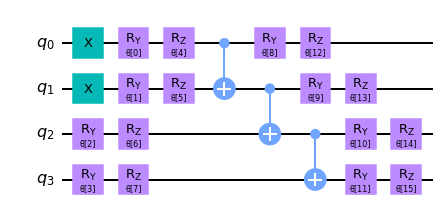

In [16]:
entangled_layer = []
for qbs in WC_paris :
    if qbs[0]<qbs[1] and qbs[1]<num_qubits :
        entangled_layer.append(qbs)

ansatz = init_state.compose( EfficientSU2(num_qubits,['ry','rz'], entanglement=entangled_layer, reps=1 ) )
ansatz.draw(output='mpl')

In [17]:
def callback( evals, params ):  
    display("{}, {}".format(len(evaluations),evals))
    clear_output(wait=True)
    parameters.append(params)
    evaluations.append(evals)

parameters  = []
evaluations = []

In [18]:
optimizer = SPSA( maxiter=100, last_avg=1 )

In [19]:
num_var = ansatz.num_parameters
pars = [0.01] * num_var

In [20]:
result_exact.eigenvalue 

(-1.0887061050307485+3.181695119645369e-17j)

In [21]:
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled' )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-1.0627137659738335


In [22]:
solver = VQE( ansatz, optimizer, pars, grouping = 'TPB' )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-1.0405037085459692


In [23]:
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', conectivity = WC_paris )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-1.0638741311966329


In [24]:
parameters  = []
evaluations = []
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', callback=callback )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-1.0420412828861778


In [25]:
# parameters  = []
# evaluations = []
# optimizer   = SPSA( maxiter=50, last_avg=1 )
# solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', callback=callback, quantum_instance=backend_noise )
# results = solver.compute_minimum_eigenvalue(qubit_op)
# print( results.eigenvalue )

In [26]:
# plt.plot( evaluations )

In [27]:
qi = QuantumInstance( backend_sim, shots = NUM_SHOTS )
parameters  = []
evaluations = []
optimizer   = SPSA( maxiter=50, last_avg=1 )
solver = VQE( ansatz, optimizer, pars, grouping = 'Entangled', quantum_instance=qi )
results = solver.compute_minimum_eigenvalue(qubit_op)
print( results.eigenvalue )

-0.9880152069164612


In [28]:
solver.ansatz

In [29]:
solver.cleanup_parameterized_circuits

<bound method VariationalAlgorithm.cleanup_parameterized_circuits of <VQE.VQE object at 0x0000020563088648>>

In [30]:
solver.construct_expectation

<bound method VQE.construct_expectation of <VQE.VQE object at 0x0000020563088648>>

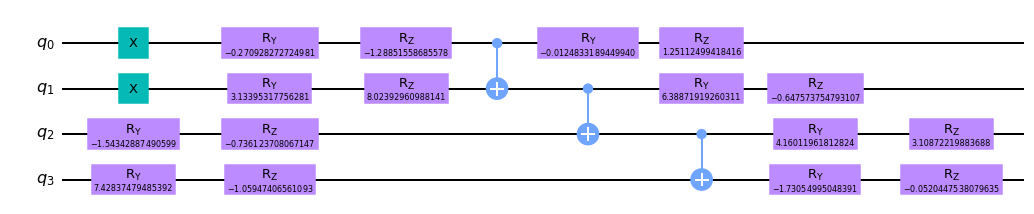

In [31]:
solver.get_optimal_circuit().draw(output='mpl')

In [32]:
solver.get_optimal_cost()

-0.9880152069164612

In [33]:
solver.get_optimal_vector()

{'0111': 0.7404997256920491,
 '1011': 0.43986525813310146,
 '0011': 0.40338533260704956,
 '1111': 0.2757712905425436,
 '0100': 0.10364452469860624,
 '0000': 0.0427908248050911,
 '1000': 0.05633673867912483,
 '0101': 0.03983608994994363,
 '1001': 0.029231698334171417,
 '1100': 0.019136638615493577,
 '0001': 0.02209708691207961,
 '1101': 0.019136638615493577}

In [34]:
# solver.get_prob_vector_for_params()

In [35]:
# solver.get_probabilities_for_counts()

In [36]:
solver.initial_point

[0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01,
 0.01]

In [37]:
solver.optimal_params

array([-0.27092827,  4.16011962, -1.73054995,  1.25112499, -0.64757375,
        3.1087222 , -0.05204475,  3.13395318, -1.54342887,  7.42837479,
       -1.28851559,  8.02392961, -0.73612371, -1.05947407, -0.01248332,
        6.38871919])

In [38]:
solver.optimizer

In [39]:
solver.quantum_instance

In [40]:
solver.supports_aux_operators()

False

In [41]:
print( solver.print_settings() )


==================== Setting of VQE ============================
Algorithm: VQE
-- ansatz_params: [ParameterVectorElement(θ[0]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9])]
-- ansatz:         ┌───┐    ┌──────────┐┌──────────┐     ┌──────────┐┌───────────┐»
q_0: ───┤ X ├────┤ RY(θ[0]) ├┤ RZ(θ[4]) ├──■──┤ RY(θ[8]) ├┤ RZ(θ[12]) ├»
        ├───┤    ├──────────┤├──────────┤┌─┴─┐└──────────┘└┬──────────┤»
q_1: ───┤ X ├────┤ RY(θ[1]) ├┤ RZ(θ[5]) ├┤ X ├─────■───────┤ RY(θ[9]) ├»
     ┌──┴───┴───┐├──────────┤└──────────┘└───┘   ┌─┴─┐     └──────────┘»
q_2: ┤ RY(θ[2]) ├┤ RZ(θ[6]) ├─────────